# Split data & Feature selection 

<h3> Split data into training, validation and test

Codes below are used to split Expedia data into training, validation and test set.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import skew
from sklearn.model_selection import train_test_split

In [18]:
train = pd.read_csv('../expedia_data/train.csv')
test = pd.read_csv('../expedia_data/test.csv')

In [19]:
print('training data has %d records'%len(train))
print('test data has %d records'%len(test))

training data has 9917530 records
test data has 6622629 records


In [20]:
cols_train_only = [col for col in train.columns.unique().tolist() if col not in test.columns.unique().tolist()]
print('Columns only available in training data:',cols_train_only)

Columns only available in training data: ['position', 'click_bool', 'gross_bookings_usd', 'booking_bool']


In [21]:
train = train.drop(columns = cols_train_only)
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [22]:
# combine train and test data
all_data = pd.concat([train, test], ignore_index=True)
all_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [24]:
print('Whole dataset has %d records' % len(all_data))

Whole dataset has 16540159 records


In [25]:
all_data['date_time'] = pd.to_datetime(all_data.date_time)
all_data.sort_values(by=['date_time'],inplace=True)

In [26]:
all_data = all_data.reset_index(drop=True)
all_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,24202,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,327,4,4.5,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,20797,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,53733,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,57269,4,4.5,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For manually splitting dataset, I first split whole dataset into training(0.8) and test set(0.2), then within training set I further split it into training set(0.8) and validation set (0.2). 

<h4> Approach1: split data manually

In [27]:
training_data = all_data[0: 10585701]
validation_data = all_data[10585701:13232127]
test_data = all_data[13232127:16540160]

In [28]:
print('training set has %d records'%len(training_data))
print('validation set has %d records'%len(validation_data))
print('test set has %d records'%len(test_data))

training set has 10585701 records
validation set has 2646426 records
test set has 3308032 records


reference: https://stats.stackexchange.com/questions/101066/split-train-validation-test-sets-by-time-is-it-correct

In [29]:
training_data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

<h4> Approach2: timeseries split

In [30]:
from sklearn.model_selection import TimeSeriesSplit

features = [col for col in all_data.columns.unique().tolist() if col != 'price_usd']
target = ['price_usd']

X = all_data[features]
y = all_data[target]

tscv = TimeSeriesSplit(n_splits=5)

In [21]:
for train_index, test_index in tscv.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # TODO: build model
    # TODO: evaluate accuracy

TRAIN: [      0       1       2 ... 2756691 2756692 2756693] TEST: [2756694 2756695 2756696 ... 5513384 5513385 5513386]
TRAIN: [      0       1       2 ... 5513384 5513385 5513386] TEST: [5513387 5513388 5513389 ... 8270077 8270078 8270079]
TRAIN: [      0       1       2 ... 8270077 8270078 8270079] TEST: [ 8270080  8270081  8270082 ... 11026770 11026771 11026772]
TRAIN: [       0        1        2 ... 11026770 11026771 11026772] TEST: [11026773 11026774 11026775 ... 13783463 13783464 13783465]
TRAIN: [       0        1        2 ... 13783463 13783464 13783465] TEST: [13783466 13783467 13783468 ... 16540156 16540157 16540158]


<h3> Feature engineering

In [32]:
# specify X and y
features = [col for col in training_data.columns.unique().tolist() if col != 'price_usd'] 
target = ['price_usd']

In [31]:
# TODO: use power analysis to decide the smallest sample size

In [47]:
# sampling training data and validation data
# training_data_small = training_data[:50000]
# validation_data_small = validation_data[:10000]

In [33]:
# random sample 5000 data from training dataset 
training_data_small = training_data.sample(5000, replace=True)

# # random select 3000 from validation dataset
validation_data_small = validation_data.sample(3000, replace=True)

not numeric features: => needs to be excluded from modeling or handle specially <br>
'srch_id','date_time', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_brand_bool', 'promotion_flag', 'srch_destination_id', 'random_bool', 'srch_satuday_night_bool'

In [34]:
# extract numeric features in dataset
non_numeric_features = ['srch_id','date_time', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_brand_bool', 'srch_satuday_night_bool','promotion_flag', 'srch_destination_id', 'random_bool']
training_features = [col for col in training_data.columns.unique().tolist() if col not in non_numeric_features + ['price_usd']]

In [40]:
# handle NA values
training_data_small = training_data_small.fillna(training_data_small.mean())
training_data_small = training_data_small.replace(np.inf,np.nan)
training_data_small = training_data_small.replace(-np.inf,np.nan)
# training_data_small = training_data_small.fillna(training_data_small.median())

validation_data_small = validation_data_small.fillna(validation_data_small.mean())
validation_data_small = validation_data_small.replace(np.inf,np.nan)
validation_data_small = validation_data_small.replace(-np.inf,np.nan)
# validation_data_small = validation_data_small.fillna(validation_data_small.median())

<h3> Lasso Regression

<h5> log transform the data:

In [42]:
training_data_small["price_usd"] = np.log1p(training_data_small["price_usd"])

# log transform skewed numeric features:
skewed_feats = training_data_small[training_features].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
print('skewed_feats:{}'.format(skewed_feats))
skewed_feats = skewed_feats.index
training_data_small[skewed_feats] = np.log1p(training_data_small[skewed_feats])

skewed_feats:prop_location_score2        1.946704
srch_length_of_stay         1.010684
srch_children_count         1.824747
srch_room_count             4.199726
comp1_inv                  28.809741
comp1_rate_percent_diff    26.521835
comp2_rate                  3.994819
comp2_inv                   7.188740
comp2_rate_percent_diff     2.003402
comp3_inv                   5.336280
comp3_rate_percent_diff     3.287311
comp4_inv                  10.634929
comp4_rate_percent_diff     5.707826
comp5_inv                   5.789717
comp5_rate_percent_diff     1.962660
comp6_rate                 10.754132
comp6_inv                  15.709997
comp7_rate                  7.641942
comp7_inv                  13.750715
comp7_rate_percent_diff     6.514415
comp8_inv                  10.022338
comp8_rate_percent_diff     1.644661
dtype: float64


/anaconda3/envs/leetcode/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


In [41]:
# set up X, y for training
X_training_data_small = training_data_small[[col for col in training_data.columns.unique().tolist()\
if col not in non_numeric_features +['price_usd']]]
y_training_data_small = training_data_small['price_usd']

X_validation_data_small = validation_data_small[[col for col in validation_data.columns.unique().tolist()\
if col not in non_numeric_features +['price_usd']]]
y_validation_data_small = validation_data_small['price_usd']

<h5> 1. normalize and standardize data (RobustScaler):

robust scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

In [43]:
# check if na values exist and how many of them
X_training_data_small.isnull().values.any()

X_training_data_small = X_training_data_small.reset_index(drop = True)
X_training_data_small.head()

X_training_data_small.isna().sum()

visitor_hist_starrating        0
visitor_hist_adr_usd           0
prop_starrating                0
prop_review_score              0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
srch_query_affinity_score      0
orig_destination_distance      0
comp1_rate                     0
comp1_inv                      2
comp1_rate_percent_diff        0
comp2_rate                   142
comp2_inv                     26
comp2_rate_percent_diff        0
comp3_rate                     0
comp3_inv                     32
comp3_rate_percent_diff        0
comp4_rate                     0
comp4_inv                      8
comp4_rate_percent_diff        0
comp5_rate                     0
comp5_inv                     37
comp5_rate_percent_diff        0
comp6_rate

In [44]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_training_data_small)
X_training_data_small_scaled = transformer.transform(X_training_data_small)
X_validation_data_small_scaled = transformer.transform(X_validation_data_small)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# build Lasso model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_training_data_small_scaled, y_training_data_small.values)

coef = pd.Series(model_lasso.coef_, index = X_training_data_small.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(8),
                     coef.sort_values().tail(8)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model (Robust scaler)")

<h5> 2. normalize and standardize data (standard scaler):  => mainly use this scaler()

In [117]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_training_data_small)
X_training_data_small_scaled = transformer.transform(X_training_data_small)
X_validation_data_small_scaled = transformer.transform(X_validation_data_small)

# build Lasso model:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_training_data_small_scaled, y_training_data_small.values)

# get feature importance:
coef = pd.Series(model_lasso.coef_, index = X_training_data_small.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(8),
                     coef.sort_values().tail(8)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model (standard scaler)")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [97]:
# make prediction
reg = LassoCV(cv=5, random_state=0).fit(X_training_data_small_scaled, y_training_data_small.values)
print('lasso training error:', reg.score(X_training_data_small_scaled, y_training_data_small.values))

NameError: name 'LassoCV' is not defined

reg.score: Returns the coefficient of determination R^2 of the prediction.

<h3> Ridge regression

Text(0,0.5,'rmse')

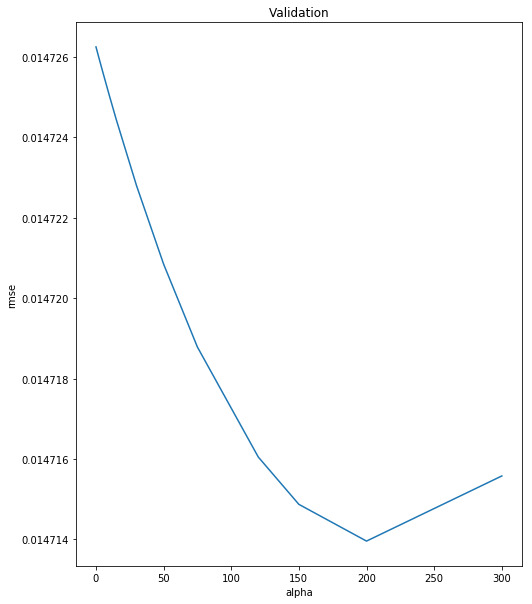

In [93]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_training_data_small_scaled, y_training_data_small.values, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 120, 150, 200,300]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

Ridge cannot be used as feature selection: https://www.zhihu.com/question/288362034/answer/463287541

In [90]:
cv_ridge.min()

0.014716050296463895

ridge can get a minimun RMSE = 0.0147

In [116]:
# clf = RidgeCV(alphas=200).fit(X_training_data_small_scaled, y_training_data_small.values)
# clf.score(X_training_data_small_scaled, y_training_data_small.values)  

rr = Ridge(alpha=200).fit(X_training_data_small_scaled, y_training_data_small.values)
print('ridge training error:', rr.score(X_training_data_small_scaled, y_training_data_small.values))

ridge training error: 0.43772595420048843


<h4> Check Residual :

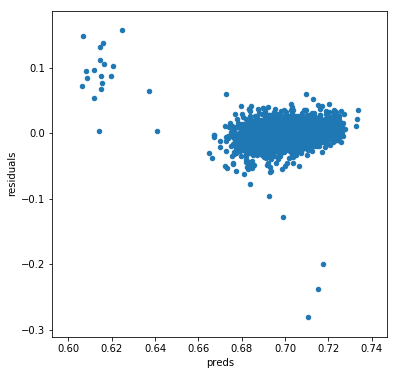

In [111]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_training_data_small_scaled), "true":y_training_data_small})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")